# Modeling Notebook

In [156]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import re
import numpy as np
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas_profiling
from pandas_profiling import ProfileReport
# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score

# import auc and roc_curve
from sklearn.metrics import auc, roc_curve
# import the logistic regression model
from sklearn.linear_model import LogisticRegression
# import r2_score
from sklearn.metrics import r2_score
# import accuracy_score
from sklearn.metrics import accuracy_score
# import RMSE and MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import AUC and ROC
from sklearn.metrics import auc, roc_curve
# import recall_score, precision_score, f1_score
from sklearn.metrics import recall_score, precision_score, f1_score
# grid search
from sklearn.model_selection import GridSearchCV
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pickle
# sklearn imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans

# adaboost imports
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
# import cross_val_score
from sklearn.model_selection import cross_val_score

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Tree imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text

from tqdm import tqdm
# from alive_progress import alive_bar

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# We will use the following models

0. A Baseline Model (50% Accuracy)

1. Logistic Regression - 
2. Gradient Boosting Classifier
3. Decision Tree Classifier
4. Naive Bayes Classifier
5. Random Forest Classifier
6. Gaussian Process Classifier

In [157]:
# model imports from sklearn
# LogisticRegression
from sklearn.linear_model import LogisticRegression
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# linear SVC
from sklearn.svm import LinearSVC
# Kernel SVC
from sklearn.svm import SVC
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [158]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# import StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [159]:
from tqdm import tqdm
import pickle

In [160]:
# Metrics and Evaluation imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
# import cross_val_score
from sklearn.model_selection import cross_val_score

# Feature Selection Imports

In [161]:

# Feature Selection using SelectKBest
# import SelectKBest
from sklearn.feature_selection import SelectKBest
# import f_classif
from sklearn.feature_selection import f_classif
from sklearn.inspection import permutation_importance

# variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

# Global Variables and Definitions

In [162]:
# create a dictionary of parameters for each model type

param_defaults = {
    'logisticregression': {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear']
    },
    'knn': {
        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'decisiontree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    'randomforestclassifier': {
        'n_estimators': [10, 50, 100, 200, 300],
        'criterion': ['gini', 'entropy'],
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4],
        'min_samples_leaf': [1, 2, 3]
    },
    'xgboost': {
        'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
        'n_estimators': [10, 50, 100, 200, 300, 400, 500],
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
        'reg_lambda': [0, 0.25, 0.5, 0.75, 1]
    },
    'adaboost': {
        'n_estimators': [10, 50, 100, 200, 300, 400, 500],
        'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'gradient_boosting': {
        'loss': ['deviance', 'exponential'],
        'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
        'n_estimators': [10, 50, 100, 200, 300, 400, 500],
        'criterion': ['friedman_mse', 'mse', 'mae'],
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'svm': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    'naive_bayes': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'fit_prior': [True, False]
    },
}

# Functions

In [163]:

def save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train,param_defaults,gridsearch=False):
    """
    save_results takes in a model and a master results dataframe and saves the model and the master results dataframe as a pickle file

    _extended_summary_

    :param model: _description_
    :type model: _type_
    :param master_results_dataframe: _description_
    :type master_results_dataframe: _type_
    :return: _description_
    :rtype: _type_
    """

    gridsearch = False # set to True if you want to use gridsearch

    if model not in ['decision_tree', 'random_forest', 'knn', 'svm', 'gradientboostingclassifier', 'adaboost', 'bagging', 'extra_trees', 'gaussian_nb', 'bernoulli_nb', 'multinomial_nb', 'linear_svc', 'xgboost']:
        # evaluate the model
        acc_score = accuracy_score(y_test, y_pred) # accuracy score for the model on the testing set
        cross_val = cross_val_score(model, X_train, y_train, cv=5).mean()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error on the testing set
        mae = mean_absolute_error(y_test, y_pred) # on the testing set
        r2 = r2_score(y_test, y_pred) #
        mse = mean_squared_error(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_score = auc(fpr, tpr)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        model_name = str(model).lower().replace(' ', '_').replace('(', '').replace(')', '')
        
        print(f'accuracy_score: {acc_score}')
        print(f'cross_val_score: {cross_val}')
        print(f'rmse: {rmse}')
        print(f'mae: {mae}')
        print(f'r2: {r2}')
        print(f'mse: {mse}')
        print(f'auc: {auc_score}')
        # print(f'false positive rate: {fpr}')
        # print(f'true positive rate: {tpr}')
        print(f'thresholds: {thresholds}')

        # AUC and ROC
        # calculate the probabilities
        try:
            y_pred_prob = model.predict_proba(X_test)[:,1]
            # calculate the false positive rate and true positive rate
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
            # calculate the area under the curve
            print(f'AUC score: {auc(fpr, tpr)}')
        except Exception as e:
            print(e)
            y_pred_prob = ''
            fpr, tpr, thresholds = '', '', ''
            auc_score = ''
            print(f'Initialized all of the following to None: y_pred_prob, fpr, tpr, thresholds, auc_score')

        #  train score
        train_score = model.score(X_train, y_train)
        # test score
        test_score = model.score(X_test, y_test)

        # perform grid search to find the best parameters
        # create a dictionary of parameters to search (for a logistic regression model)
        if gridsearch:
            try:
                print('Performing Grid Search...')
                # find the parameters dict that matches the model name in the dictionary of parameters, and assign it to params
                params = param_defaults.get(model_name) # get the parameters for the model
                cv_num = 3 # number of cross validations to perform
                print('Parameters for the model: ', params)
                print(f'Estimated time to complete grid search: {len(params)*cv_num} seconds')
                # create a grid search object
                grid_search = GridSearchCV(model, params, cv=cv_num, verbose=0, n_jobs=-1)
                # fit the grid search object to the training data
                grid_search.fit(X_train, y_train)
                # get the best parameters
                best_params = grid_search.best_params_
                # get the best score
                best_score = grid_search.best_score_
                print(f'best parameters: {best_params}')
                print(f'best score: {best_score}')
                # best params
                best_params = model.best_params_
            except Exception as e:
                print(e)
                best_params = None
                best_score = None
        else:
            best_params = None
            best_score = None
        # add the results to the master results dataframe using concat
        master_results_dataframe = pd.concat([master_results_dataframe, pd.DataFrame({ 'model': [model_name], 'accuracy_score': [acc_score], 'cross_val_score': [cross_val], 'rmse': [rmse], 'mae': [mae], 'r2': [r2], 'mse': [mse], 'auc': [auc_score], 'precision': [precision], 'recall': [recall], 'f1': [f1], 'train_score': [train_score], 'test_score': [test_score], 'best_params': [best_params], 'best_score': [best_score], 'residuals': [y_test - y_pred] })], ignore_index=True)
        # save the model and the master results dataframe as a pickle file

        pickle.dump(model, open(f'../models/{model_name}.pkl', 'wb'))
        # plot the ROC curve
        plt.plot(fpr, tpr)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model} ROC Curve')
        # save the plot as a png file
        plt.savefig(f'../images/{model}_roc_curve.png')
        plt.show(); # the ROC curve is a plot of the true positive rate against the false positive rate
    return master_results_dataframe

# checking function for data integrity
def check_xtrain_is_same(X_train, original_X_train):
    if X_train.equals(original_X_train):
        return True #  X_train is the same as original_X_train
    else:
        return False #  X_train is not the same as original_X_train

def pre_test(original_X_train, original_X_test, y_train, y_test, model, param_defaults):
    # model = AdaBoostClassifier()

    X_train = original_X_train # set to the originals
    X_test = original_X_test

    if not check_xtrain_is_same(X_train, original_X_train):
        raise Exception('X_train has been modified')


    # Feature Selection using SelectKBest
    # import SelectKBest

    # create a SelectKBest object to select features with two best ANOVA F-Values
    fvalue_selector = SelectKBest(f_classif, k=4) # 4 features with the highest scores are selected
    # apply the SelectKBest object to the features and target
    X_kbest = fvalue_selector.fit_transform(X_train, y_train)
    # create a list of the selected features
    selected_features = X_train.columns[fvalue_selector.get_support()]
    # create a list of the non-selected features
    non_selected_features = X_train.columns[~fvalue_selector.get_support()]
    # score the model with the selected features
    X_train = X_train[selected_features]
    X_test = X_test[selected_features]
    
    return X_train, X_test, y_train, y_test, model, param_defaults

def remove_vif(X_train, X_test, thresh=10, top_n = 10):
    # calculate VIF (variance inflation factor)
    
    # make a list of top 50 words that are in the top 50 words in the count vectorizer
    top_n_words = list(X_train.sum().sort_values(ascending=False).head(top_n).index)
    
    print('Calculating VIF... for the top {} words'.format(top_n))
    # load the already calculated VIFs from the pickle file if it exists
    try:
        previously_dropped = pickle.load(open('../data/vif.pkl', 'rb'))
    except Exception as e:
        print(e)
        previously_dropped = pd.DataFrame()
        print('vif.pkl does not exist. Creating a new vif dataframe.')
        
    length_of_loop = len(top_n_words)
    
    X_train_original = X_train.copy()
    X_test_original = X_test.copy()
    X_train = X_train[top_n_words]
    X_test = X_test[top_n_words]
    
    for feature in tqdm(X_train.columns):
        # if we have not already calculated the VIF for this feature (i.e. it is not in the vif dataframe)
        if feature not in previously_dropped.columns:
            # calculate the VIF for this feature
            vif_feature = pd.Series([variance_inflation_factor(X_train.values, X_train.columns.get_loc(feature))], index=[feature]) # calculate the VIF for this feature
            # if the VIF is greater than the threshold
            if vif_feature[feature] > thresh:
                # add the feature to the vif dataframe with the feature name as the column name and the VIF as the value
                previously_dropped = pd.concat([previously_dropped, vif_feature], axis=1)
                # drop the feature from the X_train and X_test dataframes
                X_train_original.drop(feature, axis=1, inplace=True)
                X_test_original.drop(feature, axis=1, inplace=True)
                print(f'Dropped {feature} from the dataframes.')
                # save the vif dataframe as a pickle file
                pickle.dump(previously_dropped, open('../data/vif.pkl', 'wb'))
            else: # if the VIF is less than the threshold
                # pass and continue to the next feature
                pass
        else: # we have already calculated the VIF for this feature
            # pass and continue to the next feature
            print(f'Already calculated VIF for {feature}.')
    
    # now drop any of the features 
    return X_train, X_test


def remove_correlated_features(X_train, X_test, thresh=0.8):
    # calculate the correlation matrix
    corr_matrix = X_train.corr().abs()
    # create a mask to select upper triangle of correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    # select the upper triangle of the correlation matrix
    upper = corr_matrix.mask(mask)
    # find the features with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > thresh)]
    # drop the features in the to_drop list from the X dataframe
    X_train.drop(to_drop, axis=1, inplace=True)
    X_test.drop(to_drop, axis=1, inplace=True)
    return X_train, X_test

def remove_low_variance_features(X_train, X_test, thresh=0.0):
    # create a VarianceThreshold object with a threshold of 0.8
    sel = VarianceThreshold(threshold=thresh)
    # fit the selector to the features
    sel.fit(X_train)
    # get the support of the features
    support = sel.get_support()
    # get the features that are not constant
    non_constant_features = X_train.columns[support]
    # get the features that are constant
    constant_features = [feat for feat in X_train.columns if feat not in non_constant_features]
    # drop the constant features from the X dataframe
    X_train.drop(constant_features, axis=1, inplace=True)
    X_test.drop(constant_features, axis=1, inplace=True)
    return X_train, X_test

def remove_low_information_features(X_train, X_test, thresh=0.8):
    # create a list to store the low information features
    low_information_cols = []
    # iterate over each feature in the X dataframe
    for col in X_train.columns:
        # calculate the ratio
        ratio = X_train[col].value_counts(normalize=True, dropna=False).values[0]
        # if the ratio is greater than or equal to the threshold
        if ratio >= thresh:
            # append the column name to the low_information_cols list
            low_information_cols.append(col)
    # drop the low information features from the X dataframe
    X_train.drop(low_information_cols, axis=1, inplace=True)
    X_test.drop(low_information_cols, axis=1, inplace=True)
    return X_train, X_test

def remove_highly_correlated_features(X_train, X_test, thresh=0.8):
    # calculate the correlation matrix
    corr_matrix = X_train.corr().abs()
    # create a mask to select upper triangle of correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    # select the upper triangle of the correlation matrix
    upper = corr_matrix.mask(mask)
    # find the features with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > thresh)]
    # drop the features in the to_drop list from the X dataframe
    X_train.drop(to_drop, axis=1, inplace=True)
    X_test.drop(to_drop, axis=1, inplace=True)
    return X_train, X_test


# Reading in the data

In [164]:
# read in the data from the premodeling notebook
df_reddit = pd.read_csv('../data/df_outliers_removed.csv')

# Count Vectorizing the Text

In [165]:
# create a count vectorizer object
count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
# fit and transform the count vectorizer on the selftext column
try:
    X = count_vectorizer.fit_transform(df_reddit['selftext']) # X is a sparse matrix
except:
    print('There was an error')
    X = None
if X is not None:
    # convert to dense
    X = X.todense() # X is now a dense matrix, which means it is no longer sparse and has no zeros
    # convert to a dataframe and set the column names to the words in the count vectorizer
    X = pd.DataFrame(X, columns=count_vectorizer.get_feature_names())
X.head()

,aba,ability,able,absolutely,abuse,accept,accidentally,account,act,acting,...,yeah,year,years,yes,yesterday,yo,young,younger,youre,youtube
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
# check the dimensions of the dataframe
if X.shape[0] != df_reddit.shape[0]:
    print('The dataframe dimensions do not match!')
else:
    print(f'Dimensions of the dataframe: {X.shape}')
# X.head(5)
# Now we want to add the target column to the X dataframe so that we can use it to train the model
# add the target column to the X dataframe (the target column is the subreddit column from the df_reddit dataframe)
X['subreddit_target'] = df_reddit['target']
# check the dimensions of the dataframe
if X.shape[0] != df_reddit.shape[0]:
    print('The dataframe dimensions do not match!')
else:
    print(f'Dimensions of the dataframe: {X.shape}')

# import train_test_split
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.drop('subreddit_target', axis=1), X['subreddit_target'], test_size=0.2, random_state=42)
# check the dimensions of the training and testing sets
if X_train.shape[0] != y_train.shape[0]:
    print('The training set dimensions do not match!')
else:
    print(f'Dimensions of the training set: {X_train.shape}')
if X_test.shape[0] != y_test.shape[0]:
    print('The testing set dimensions do not match!')
else:
    print(f'Dimensions of the testing set: {X_test.shape}')


Dimensions of the dataframe: (6299, 1000)
Dimensions of the dataframe: (6299, 1001)
Dimensions of the training set: (5039, 1000)
Dimensions of the testing set: (1260, 1000)


### Saving the original x_train and x_test

In [167]:

# Establish original_X_train and original_X_test
original_X_train = X_train
original_X_test = X_test
vif_dropped = [] # list to store the features that were dropped

In [169]:
# implementing the vif function on the top_50_words only (this will be used to drop features)
if vif_dropped == []: # if the list is empty
    X_train, X_test = remove_vif(X_train, X_test, 4, 500) # remove features with VIF greater than 5
    vif_dropped.append(X_train.columns) # append the features that were dropped to the vif_dropped list
else:
    print('The VIF function has already been run!')
# implementing the remove_low_variance_features function
# purpose: remove features with a variance of zero (i.e. features that have the same value for all observations)
X_train, X_test = remove_low_variance_features(X_train, X_test, 0.0) # remove features with a variance of zero

Calculating VIF... for the top 500 words


 12%|█▏        | 60/500 [00:32<04:10,  1.76it/s]

In [ ]:
# save the names of the features that were removed so we can perform this step only once.
vif_dropped = [col for col in original_X_train.columns if col not in X_train.columns] # list of features that were removed

## Creating the Model Results DataFrame

In [ ]:
# model results df
master_results_dataframe = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'auc', 'cross_val_score', 'rmse', 'mae', 'r2','mse', 'time','train_score', 'test_score', 'best_params', 'residuals'])

# Encoding the Target Variable

In [ ]:
# import label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # purpose: encode the target column
y_train = encoder.fit_transform(y_train) # fit and transform the target column on the training set (i.e. the target column is the subreddit column from the df_reddit dataframe). This is done so that the model can understand the target column, which is a string and not a number. 

# Naive Bayes Classifier

This classifier is very easily affected by mulcollinearity, as its name implies, it is "naive" and assumes that the features are independent of each other. It is also very fast to train and predict.

In [ ]:
# preparing a special dataset for the naive bayes model that is clean of any multicollinearity
correlations = X_train.corr() # calculate the correlation matrix
correlations = correlations.abs() # absolute value of the correlations (i.e. no negative values)

In [ ]:
# remove any features with a correlation greater than 0.75 from this models training and testing sets
nb_X_train = X_train.copy()
nb_X_test = X_test.copy()
# create a list of the columns to remove
cols_to_remove = [] # create an empty list
# loop through the columns in the correlation matrix
for col in correlations: # for each column in the correlation matrix
    # loop through the correlation values of the columns
    for i in range(len(correlations[col])):
        # if the correlation value is greater than 0.75 and the column is not the same as the index
        if correlations[col][i] > 0.75 and col != correlations.index[i]:
            # add the column to the list of columns to remove
            cols_to_remove.append(col)
# remove the columns from the training and testing sets
nb_X_train.drop(cols_to_remove, axis=1, inplace=True)
nb_X_test.drop(cols_to_remove, axis=1, inplace=True)
# check the dimensions of the training and testing sets
if nb_X_train.shape[0] != y_train.shape[0]:
    print('The training set dimensions do not match!')
else:
    print(f'Dimensions of the training set: {nb_X_train.shape}')
if nb_X_test.shape[0] != y_test.shape[0]:
    print('The testing set dimensions do not match!')
else:
    print(f'Dimensions of the testing set: {nb_X_test.shape}')

# which features did we remove?
print(f'Features removed: {cols_to_remove}')

Dimensions of the training set: (5039, 50)
Dimensions of the testing set: (1260, 50)
Features removed: []


accuracy_score: 0.846031746031746
cross_val_score: 0.8319107517220724
rmse: 0.3923878871324317
mae: 0.15396825396825398
r2: 0.3588879417743098
mse: 0.15396825396825398
auc: 0.8652940790767818
thresholds: [2 1 0]
AUC score: 0.8925486853321094


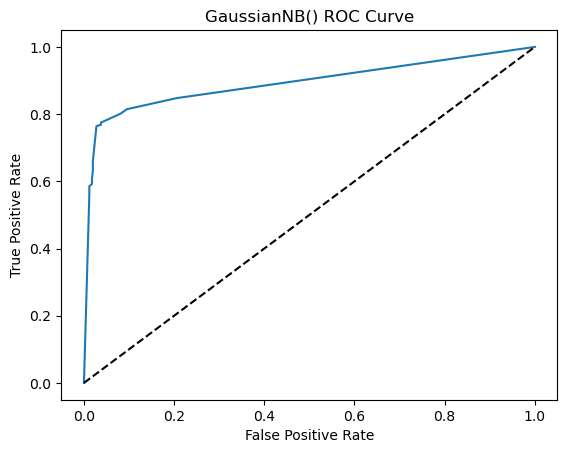

In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB


# create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

model = gnb

X_train, X_test, y_train, y_test, model, param_defaults = pre_test(X_train, X_test, y_train, y_test, model, param_defaults)

# fit the model on the training data
gnb.fit(X_train, y_train)

# predict on the testing data
y_pred = gnb.predict(X_test)

master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults,gridsearch=False)

### Feature Importance by Permutation Analysis

In [ ]:
result = permutation_importance(model, X.values, y, n_repeats=10, random_state=42)

perm_imp_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[perm_imp_idx].T, vert=False,
            labels=X.columns[perm_imp_idx])
plt.title('Feature Importance from Rain in Australia Dataset')
plt.show()

NameError: name 'y' is not defined

## Logistic Regression

In [ ]:
model = LogisticRegression()

X_train = original_X_train # set to the originals
X_test = original_X_test


if not check_xtrain_is_same(X_train, original_X_train):
    raise Exception('X_train has been modified')

# create a SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=4) # 4 features with the highest scores are selected

# apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X_train, y_train)
# create a list of the selected features
selected_features = X_train.columns[fvalue_selector.get_support()]
# create a list of the non-selected features
non_selected_features = X_train.columns[~fvalue_selector.get_support()]
# score the model with the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]


In [ ]:
# check the shape of the training data to make sure it is the same as the testing data

# create a logistic regression model
logreg = LogisticRegression()
# fit the model to the training data
logreg.fit(X_train, y_train)
# score the model on the training data
logreg.score(X_train, y_train)
# score the model on the testing data
logreg.score(X_test, y_test)
# predict the target values for the testing data
y_pred = logreg.predict(X_test)
# create a confusion matrix
confusion_matrix(y_test, y_pred)
# create a classification report
print(classification_report(y_test, y_pred))
# create a dataframe of the coefficients
coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': logreg.coef_[0]})
# sort the coefficients by their magnitude
coefficients.sort_values('coefficient', ascending=False, inplace=True)
# plot the coefficients
plt.figure(figsize=(10, 10))
plt.barh(coefficients['feature'], coefficients['coefficient'])
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.savefig('../images/logreg_coefficients.png')
plt.show();
master_results_dataframe = save_results(logreg,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)

## Gradient Boosting Classifier

In [ ]:
# create a Gradient Boosting classifier
gbc = GradientBoostingClassifier()
model = gbc

X_train, X_test, y_train, y_test, model, param_defaults = pre_test(X_train, X_test, y_train, y_test, model, param_defaults)

# fit the model on the training data
gbc.fit(X_train, y_train)

# predict on the testing data
y_pred = gbc.predict(X_test)

master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)


## Random Forest Classifier

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
rfc = RandomForestClassifier()
model = rfc

X_train, X_test, y_train, y_test, model, param_defaults = pre_test(X_train, X_test, y_train, y_test, model, param_defaults)

# fit the model on the training data
rfc.fit(X_train, y_train)

# predict on the testing data
y_pred = rfc.predict(X_test)

master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)

## Decision Tree Classifier
*note: be sure to scale before using decision trees*

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


# create a Decision Tree classifier
dtc = DecisionTreeClassifier()

model = dtc

X_train, X_test, y_train, y_test, model, param_defaults = pre_test(X_train, X_test, y_train, y_test, model, param_defaults)

#note: Be sure to scale the data before using SVM
X_train_sc = sc.fit_transform(X_train) # fit and transform the training data
X_test_sc = sc.transform(X_test) # transform the testing data


# fit the model on the training data

dtc.fit(X_train, y_train)

# predict on the testing data

y_pred = dtc.predict(X_test)

print(f'Preparing The Results')
master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)

In [ ]:
master_results_dataframe.head(30)